In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%config InlineBackend.figure_format = 'svg'

In [44]:
data = pd.read_csv('ShortTermPred.csv')

In [45]:
data.head()

,0,DayOfWeek,VisitingTeam_Team,DayNight,Attendance,GameNumber,WinLossRatio,WinLossRatioLast10,max_temperature,precipitation,year,month,HomeOpener,Soccergame
0,1978-04-14,Fri,DET,D,35761.0,1,0,0.0,5.8,0.0,1978,4,1.0,0.0
1,1978-04-15,Sat,DET,D,15024.0,2,1,1.0,4.9,0.0,1978,4,0.0,0.0
2,1978-04-16,Sun,DET,D,17088.0,3,0,0.0,8.6,0.0,1978,4,0.0,0.0
3,1978-04-17,Mon,KCA,D,10169.0,4,-1,-1.0,10.2,0.0,1978,4,0.0,0.0
4,1978-04-18,Tue,KCA,D,10218.0,5,-2,-2.0,11.0,1.4,1978,4,0.0,0.0


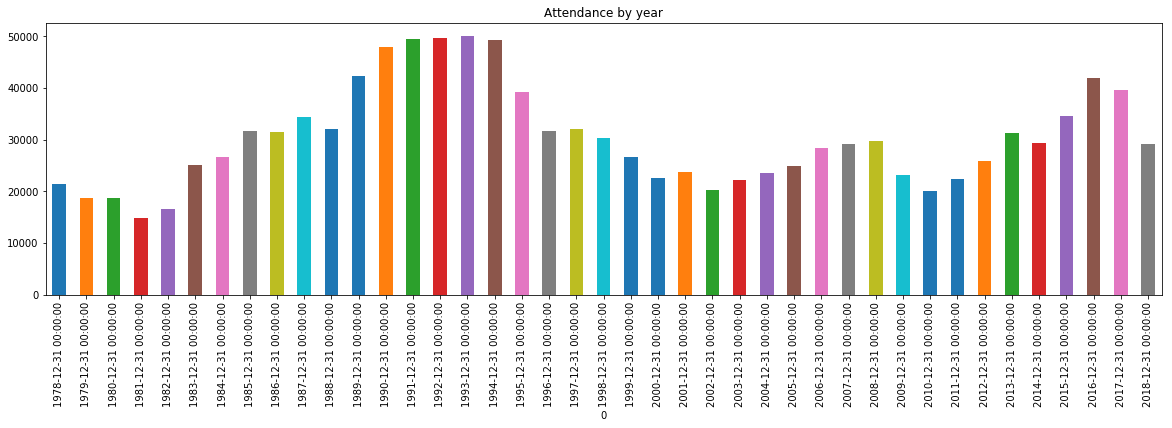

In [59]:

#from dateutil.parser import parse
#pd.to_datetime(data['0'], format = '%Y-%m-%d')
#data.set_index('0', inplace = True)
#data.index = pd.to_datetime(data.index, format = '%Y-%m-%d')
data.resample('Y')['Attendance'].mean().plot.bar(figsize = (20,5),title='Attendance by year')


In [110]:
### Ploting data for one year

#tordata[tordata.index.year == 1990][17].plot(title = '1990')
#tordata[tordata.index.year == 1991][17].plot()
#tordata[tordata.index.year == 1992][17].plot()
#tordata[tordata.index.year == 1993][17].plot()
#tordata[tordata.index.year == 1994][17].plot()
#tordata[tordata.index.year == 1995][17].plot()
#data[data.index.year == 2018]['Attendance'].plot(title = '2018',figsize=(20,10))

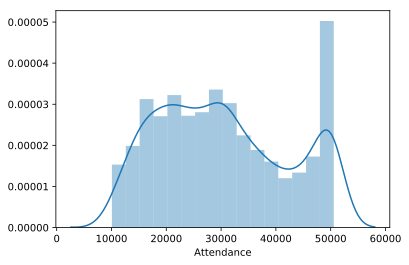

In [145]:
sns.distplot(data['Attendance']);

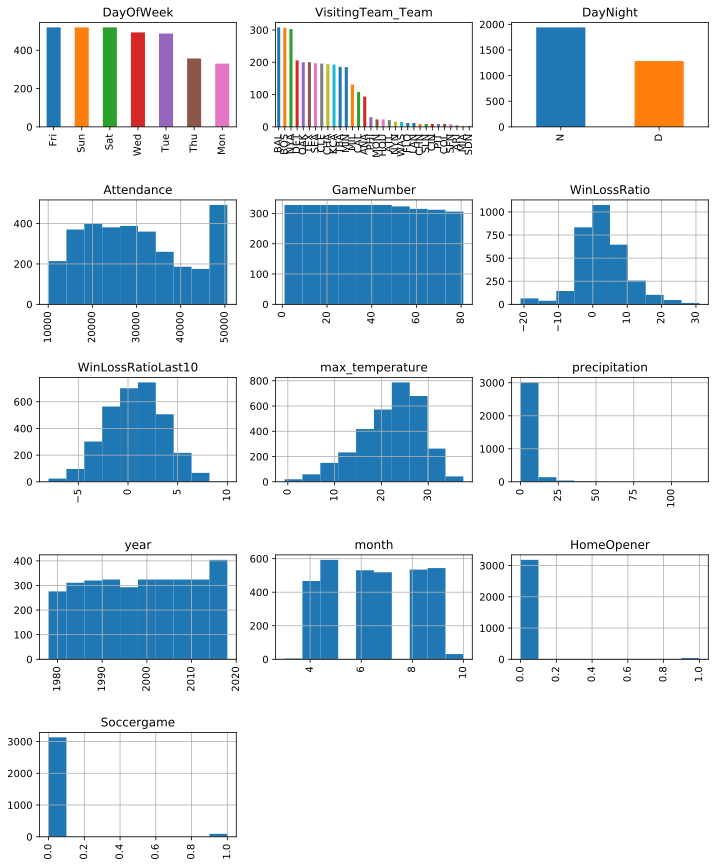

In [101]:
## For categorical variables, count 
## For numberical variables, histogram

fig = plt.figure(figsize=(12, 15))
cols = 3
rows = np.ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

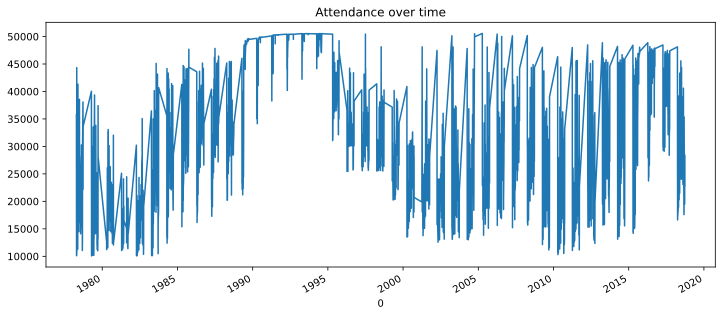

In [116]:
data['Attendance'].plot(figsize = (12,5),title='Attendance over time')

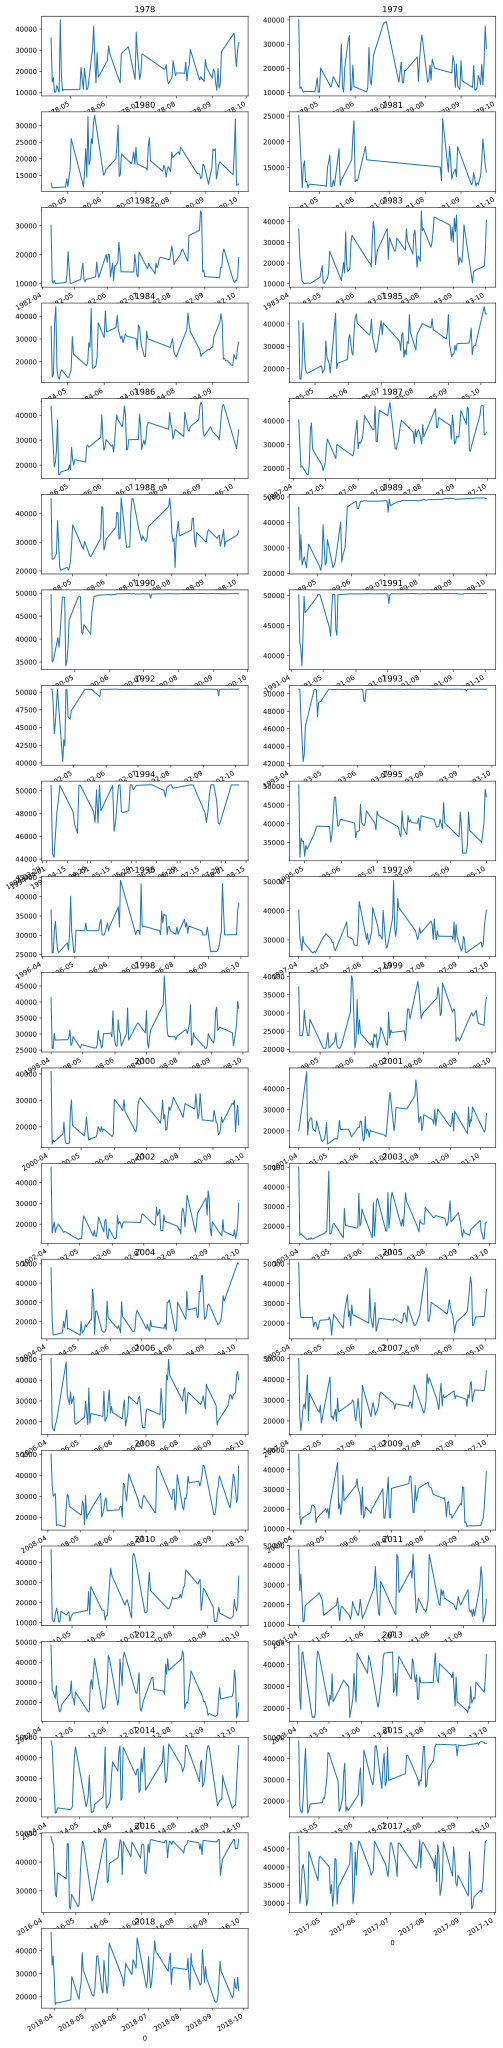

In [109]:
## Attendance over time for each year
fig = plt.figure(figsize=(12, 60))
cols = 2
rows = (len(data.index.year.unique()) / cols)+1
for i, year in enumerate(data.index.year.unique()):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(year)
    data[data.index.year == year]['Attendance'].plot()

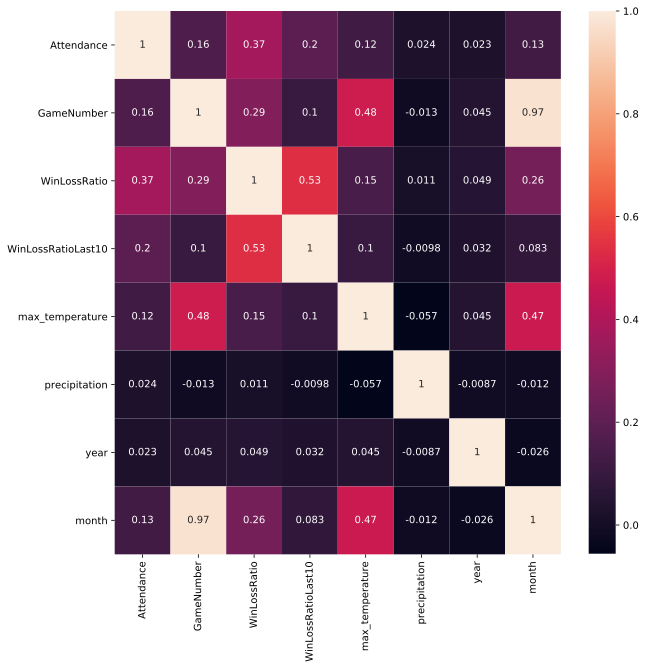

In [117]:
## Correlation matrix with all numerical variables
numerical = ['Attendance','GameNumber','WinLossRatio','WinLossRatioLast10','max_temperature','precipitation','year','month']
corr_matrix = data[numerical].corr()
fig=plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot = True);

Text(0.5, 1.0, 'Soccer game')

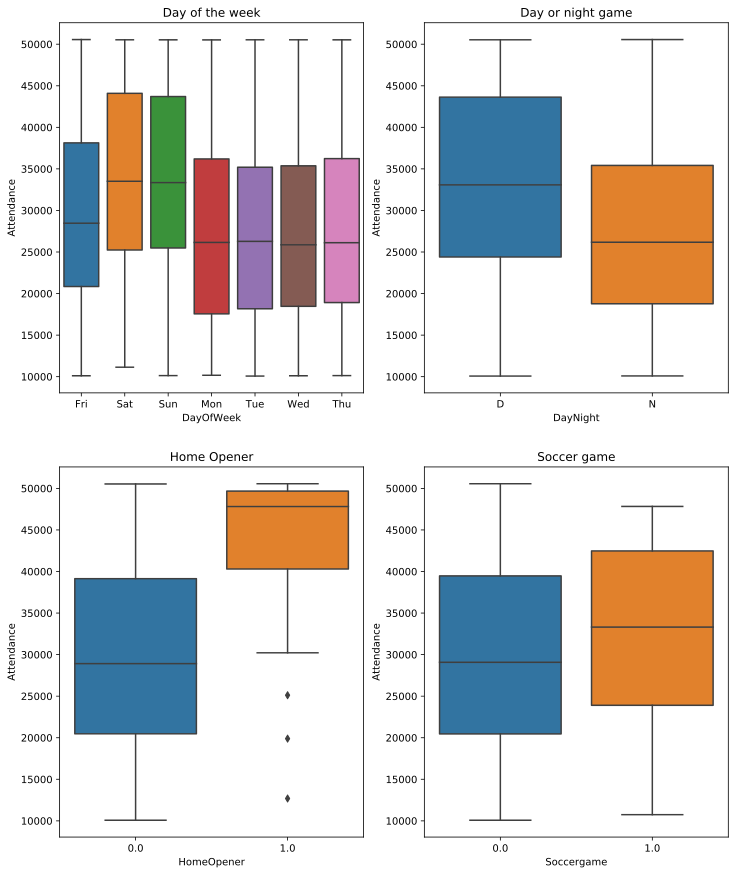

In [143]:
## How attendance is related to the categorical variables
fig = plt.figure(figsize=(12,15))
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(x='DayOfWeek',y='Attendance',data=data).set_title('Day of the week')
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(x='DayNight',y='Attendance',data=data).set_title('Day or night game')
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(x='HomeOpener',y='Attendance',data=data).set_title('Home Opener')
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(x='Soccergame',y='Attendance',data=data).set_title('Soccer game')

Text(0.5, 1.0, 'Opponent')

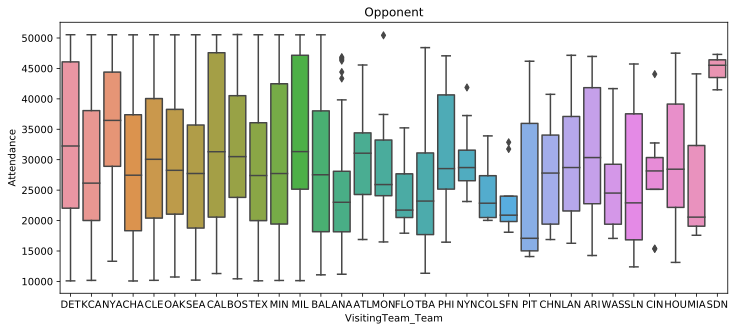

In [144]:
fig = plt.figure(figsize=(12,5))
sns.boxplot(x='VisitingTeam_Team',y='Attendance',data=data,).set_title('Opponent')